In [1]:

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import folium

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

C:\Anaconda3\envs\geo37\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
#os.listdir('/dbfs/FileStore/mike.hudgell@os.uk/')

data_path = 'C:/Users/mhudgell/data/'
os.listdir(data_path)

['dft-road-casualty-statistics-accident-last-5-years.csv',
 'dft-road-casualty-statistics-accident-last-5-years_sussex.csv',
 'dft-road-casualty-statistics-casualty-last-5-years.csv',
 'dft-road-casualty-statistics-vehicle-last-5-years.csv',
 'OS VectorMap District (ESRI Shape File) SU',
 'PFA_DEC_2021_EW_BGC.cpg',
 'PFA_DEC_2021_EW_BGC.dbf',
 'PFA_DEC_2021_EW_BGC.prj',
 'PFA_DEC_2021_EW_BGC.shp',
 'PFA_DEC_2021_EW_BGC.shx',
 'Police_Force_Areas_(December_2021)_EW_BGC.xml']

In [3]:
file_path = data_path +'dft-road-casualty-statistics-accident-last-5-years.csv'
print(file_path)
rta = pd.read_csv(file_path)

C:/Users/mhudgell/data/dft-road-casualty-statistics-accident-last-5-years.csv


C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
geometry = [Point(xy) for xy in zip(rta.location_easting_osgr, rta.location_northing_osgr)]
#geometry = [Point(xy) for xy in zip(rta.longitude, rta.latitude)]
crs = {'init': 'epsg:27700'} #4326
rta_gdf = gpd.GeoDataFrame(rta, crs=crs, geometry=geometry)

C:\Anaconda3\envs\geo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

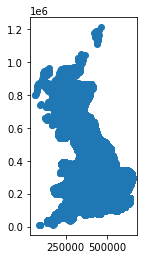

In [5]:
rta_gdf.plot()

In [6]:
police_areas_gdf = gpd.read_file(data_path + 'PFA_DEC_2021_EW_BGC.shp')

<AxesSubplot:>

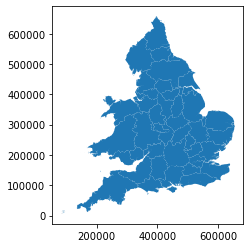

In [7]:
police_areas_gdf.plot()

In [8]:
sussex_poly = police_areas_gdf.loc[police_areas_gdf['PFA21NM'] == 'Sussex'] #.geometry

In [9]:

sussex_rta = gpd.sjoin(rta_gdf, sussex_poly, how="inner")
sussex_rta['date_time'] = sussex_rta['date'] + " " + sussex_rta['time']
sussex_rta['date_time'] = sussex_rta['date_time'] = pd.to_datetime(sussex_rta['date_time'], format="%d/%m/%Y %H:%M")
sussex_rta['day_of_week'] = sussex_rta['date_time'].dt.day_of_week
sussex_rta['month'] = sussex_rta['date_time'].dt.month
sussex_rta['hour'] = sussex_rta['date_time'].dt.hour
sussex_rta['day_of_year'] = sussex_rta['date_time'].dt.day
sussex_rta['week_number'] = sussex_rta['date_time'].dt.week
sussex_rta['time'] = sussex_rta['date_time'].dt.time
sussex_rta['number_of_vehicles'] = sussex_rta['number_of_vehicles'].astype(int)
sussex_rta['number_of_casualties'] = sussex_rta['number_of_casualties'].astype(int)
sussex_rta['LONG'] = sussex_rta['longitude'].astype(float)
sussex_rta['LAT'] = sussex_rta['latitude'].astype(float)
#sussex_rta['loc'] = sussex_rta[['LAT','LONG']].apply(lambda x: pd.Series([x.values]), axis=1)
#sussex_rta['loc'] = sussex_rta[['LAT','LONG']].apply(lambda x: x.values, axis=1)
sussex_rta['east'] = sussex_rta['location_easting_osgr'].astype(float)
sussex_rta['north'] = sussex_rta['location_northing_osgr'].astype(float)

C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [10]:
sussex_rta.head(2)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,GlobalID,SHAPE_Leng,SHAPE_Area,date_time,month,hour,day_of_year,week_number,east,north
108207,2016471600009,2016,471600009,510617.0,102999.0,-0.431144,50.815918,47,3,3,...,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09,2016-01-01 15:46:00,1,15,1,53,510617.0,102999.0
108208,2016471600013,2016,471600013,530194.0,104435.0,-0.152876,50.824758,47,2,2,...,{2A204699-2B56-42AD-B396-7F535D40D5FB},711999.620282,3.786718e+09,2016-01-01 21:50:00,1,21,1,53,530194.0,104435.0


In [11]:
rta = pd.read_csv(file_path)

C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
file_path = data_path +'dft-road-casualty-statistics-accident-last-5-years_sussex.csv'
print(file_path)
sussex_rta.to_csv(file_path)

C:/Users/mhudgell/data/dft-road-casualty-statistics-accident-last-5-years_sussex.csv


In [13]:
rta = pd.read_csv(file_path)
#geometry = [Point(xy) for xy in zip(rta.location_easting_osgr, rta.location_northing_osgr)]
geometry = [Point(xy) for xy in zip(rta.longitude, rta.latitude)]
crs = {'init': 'epsg:4326'} #4326 #27700
sussex_rta = gpd.GeoDataFrame(rta, crs=crs, geometry=geometry)

C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Anaconda3\envs\geo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

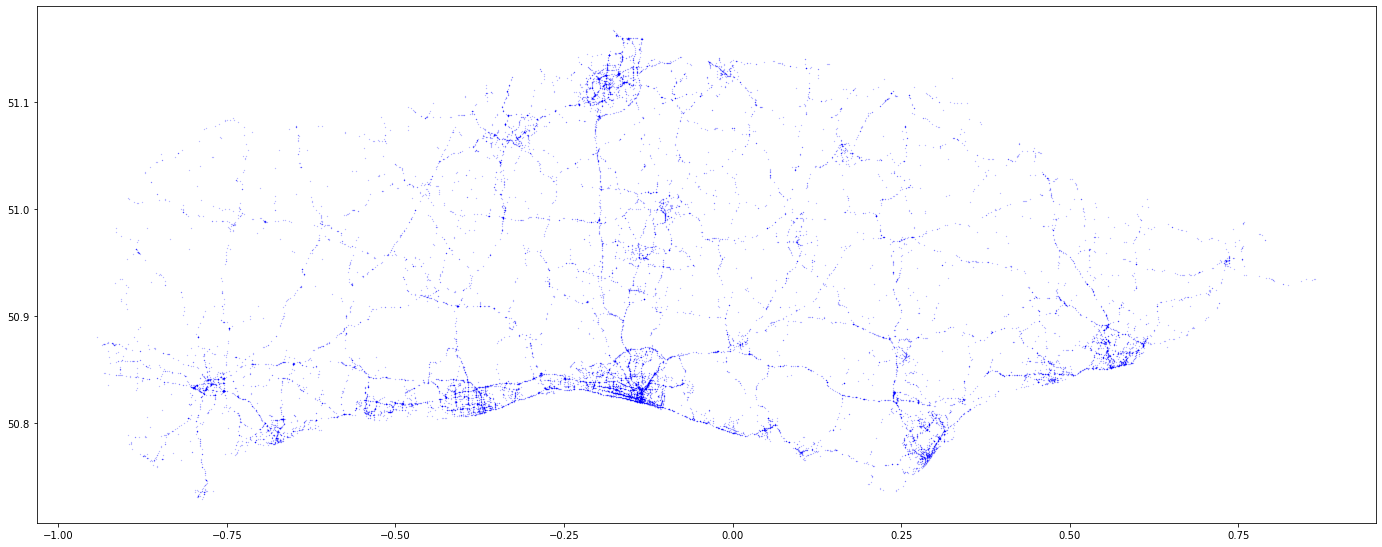

In [14]:
fig, ax = plt.subplots(figsize=(24, 12))
sussex_rta.plot(ax=ax, alpha=0.5, color='blue', markersize=0.05)

In [38]:

from sklearn.cluster import DBSCAN

kms_per_radian = 6371.0088
epsilon = .00040# #100 #1000    25K   000    #.25 / kms_per_radian #0.75
dbs = DBSCAN(eps=epsilon, min_samples=3)

In [39]:
#X = np.array(sussex_rta[['east' ,'north']])
X = np.array(sussex_rta[['LONG' ,'LAT']])

In [40]:
X

array([[-0.431144, 50.815918],
       [-0.152876, 50.824758],
       [ 0.285727, 50.767339],
       ...,
       [-0.775027, 50.837476],
       [-0.402197, 50.856738],
       [-0.182683, 51.144   ]])

In [41]:
dbs.fit(X)

DBSCAN(eps=0.0004, min_samples=3)

In [42]:
cluster_labels = dbs.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([X[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))


Number of clusters: 1442


In [43]:
dbs.labels_.shape

(18991,)

In [44]:
dbs.labels_.max()

1440

In [45]:
dbs.labels_[0:100]

array([   0,    1,    2,   -1,   -1,    3,   -1,   -1,   -1,    4,   -1,
          5,   -1,   -1,   -1,    6,    7,   -1,    8,  104,    9,   10,
         11,   12,   -1,   -1,   -1,   13,   14,   15,   -1,  164,   16,
         -1,   17,   -1,   -1,   18,   -1,   -1,   -1,   -1,   19,   -1,
         20,   21,   -1,   -1,   22,   -1,   -1,   -1, 1164,   -1,   -1,
         23,   24,   -1,   -1,   -1,   -1,   -1,   -1,   25,   26,   27,
       1122,   -1,   -1,   -1,   -1,   -1,   -1, 1062,   -1,   28,   -1,
         29, 1401,   -1,   30,   -1,   -1,   -1,   -1,   -1,   -1,   31,
         -1,   -1,   -1,   32, 1341,   -1,   -1,   33,   -1,    9,  514,
         -1], dtype=int64)

In [46]:
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1441
Estimated number of noise points: 11248


In [47]:
sussex_rta['cluster'] = dbs.labels_

<AxesSubplot:>

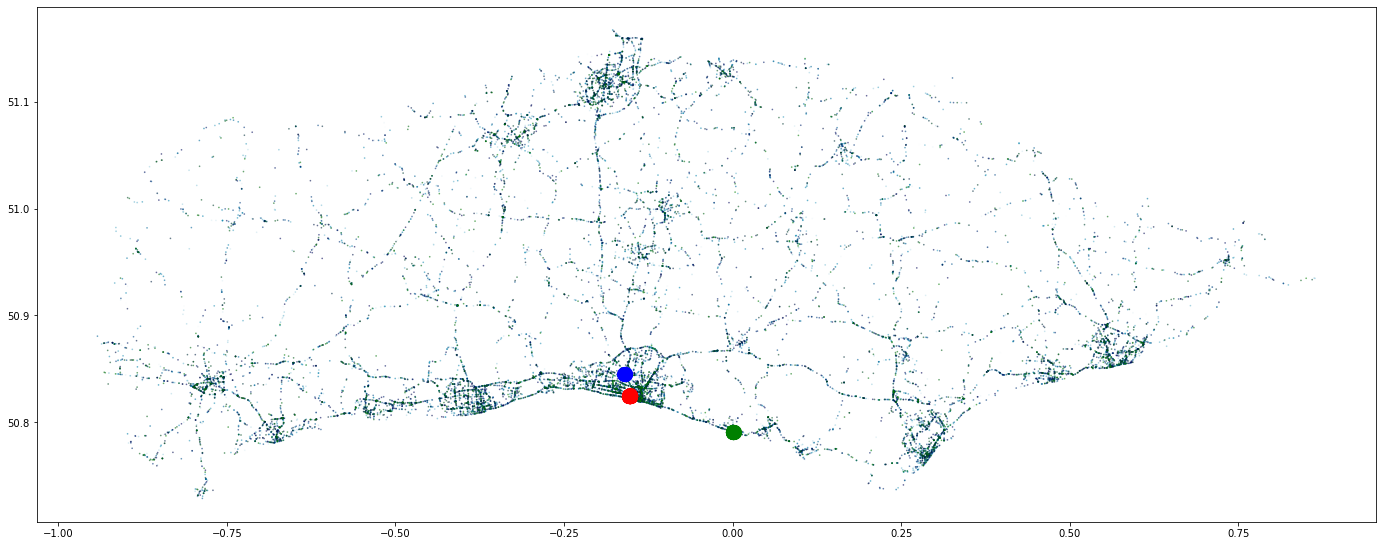

In [48]:
fig, ax = plt.subplots(figsize=(24, 12))
test1 = sussex_rta[sussex_rta['cluster'] == 1]
test2 = sussex_rta[sussex_rta['cluster'] == 3]
test5 = sussex_rta[sussex_rta['cluster'] == 5]
sussex_rta.plot(ax=ax, alpha=.5, markersize=.5, c=sussex_rta.cluster, cmap='ocean_r')
test1.plot(ax=ax, alpha=1, markersize=200, color='red')
test2.plot(ax=ax, alpha=1, markersize=200, color='green')
test5.plot(ax=ax, alpha=1, markersize=200, color='blue')

In [49]:
#https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/



In [50]:
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [51]:
clusters

0       [[-0.431144, 50.815918], [-0.430519, 50.815945...
1       [[-0.152876, 50.824758], [-0.153706, 50.824951...
2       [[0.285727, 50.767339], [0.28573, 50.76735], [...
3       [[0.000439, 50.790994], [0.000591, 50.790883],...
4       [[-0.173964, 50.827968], [-0.174086, 50.828114...
                              ...                        
1437    [[-0.300862, 51.05265], [-0.30045, 51.052316],...
1438    [[-0.880307, 50.959039], [-0.880741, 50.95934]...
1439    [[-0.344147, 51.044103], [-0.344136, 51.043617...
1440    [[-0.144122, 50.853325], [-0.144486, 50.853097...
1441                                                   []
Length: 1442, dtype: object

In [52]:
products_list = [['laptop',1300],['printer',150],['tablet',300],['desk',450],['chair',200]]

df = pd.DataFrame (products_list, columns = ['product_name', 'price'])

In [58]:
cluster_list = []

for n in range(0, n_clusters_):
    temp_df = sussex_rta[sussex_rta['cluster'] == n]
    #print("Cluster: ", str(n), len(temp_df.index))
    ch = temp_df.unary_union.convex_hull    
    cluster_list.append([n, len(temp_df.index), ch, ch.centroid.x, ch.centroid.y])

    
df = pd.DataFrame (cluster_list, columns = ['cluster', 'num_rta', 'polygon', 'long', 'lat'])


In [54]:
df.head(2)

,cluster,num_rta,polygon,long,lat
0,0,13,"POLYGON ((-0.431675 50.815777, -0.431468 50.81...",-0.431080,50.815918
1,1,28,"POLYGON ((-0.152005 50.824617, -0.152925 50.82...",-0.152804,50.824859


In [55]:

geometry = [Point(xy) for xy in zip(df.long, df.lat)]
crs = {'init': 'epsg:4326'}
sussex_rta_cluster_centroids = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\Anaconda3\envs\geo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [56]:

geometry = df.polygon
crs = {'init': 'epsg:4326'}
sussex_rta_cluster_areas = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\Anaconda3\envs\geo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [57]:
map = folium.Map(location = [51, 0], tiles='OpenStreetMap' , zoom_start = 10)
folium.GeoJson(data=sussex_rta_cluster_areas["geometry"]).add_to(map)

for index, row in sussex_rta_cluster_centroids.iterrows():
    iframe = folium.IFrame('Num RTA: ' + str(row["num_rta"]))
    popup = folium.Popup(iframe, min_width=100, max_width=30)
    folium.Marker(location=[row['lat'],row['long']],
                  popup = popup, ).add_to(map)
    
map